In [224]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [225]:
import os
os.getcwd()

'/content'

In [226]:
# Read the file
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [227]:
df.shape

(9240, 37)

In [228]:
# Check for NaN values in the DataFrame
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [229]:
#Following columns have null value
#Asymmetrique Profile Score  , Asymmetrique Activity Score, Asymmetrique Activity Index,
#Asymmetrique Profile Index,  Lead Profile, City, Lead Quality , Tags, Lead Source,
#Total Time Spent on Website , Page Views Per Visit, Last Activity, Country, Specialization
#How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course

In [230]:
# Calculate percentage of null values in each column
#we will remove those columns with more than 40% null
null_percentages = (df.isnull().sum() / df.shape[0]) * 100

# Print the null value percentages
print(null_percentages)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [231]:
#Drop all the columns in which greater than 3600 missing values,
#which is 40% and above of the dataset
for col in df.columns:
  if df[col].isnull().sum() > 3600:
    df.drop(col, 1, inplace=True)

In [232]:
df.shape

(9240, 32)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [234]:
#dropping city and country
df.drop(['City'], axis=1, inplace = True)
df.drop(['Country'], axis=1, inplace = True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [236]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [237]:
#replacinf select with NAN
df.replace('Select', np.nan, inplace=True)

In [238]:
#finding missing value in perentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Lead Profile & How did you hear about X Education columns have a high percentage of missing values ie 74% and 78% respectively and can be dropped


In [239]:
#dropping city and country
df.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace = True)


In [240]:
#dropping any column above 39% missing values

df.drop(['Tags'], axis=1, inplace = True)


In [241]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [242]:
# Get the value counts of all object type columns to keep them in a separate variable
#and check all values
for column in df:
  print(df[column].astype('category').value_counts())
  print("_________________________________________")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
_________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
_________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
______________________________________

The following columns have imbalanced data. There are few columns where only value has majority for all data poins. hence the following columns will be removed: Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
'Update me on Supply Chain Content', 'Get updates on DM Content',
'I agree to pay the amount through cheque'

In [243]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
'Update me on Supply Chain Content', 'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [244]:
df.shape

(9240, 15)

In [245]:
#reducing the rows that have missing values if less than 2%
df = df[~pd.isnull(df["TotalVisits"])]
df = df[~pd.isnull(df["Lead Source"])]

In [246]:
#checking to see the shape after reducing a few row
df.shape

(9074, 15)

In [247]:
#creating a seperate missing column for categorical varibles.
#these 2 variables have more than 30-35% missing values, so  creating aseparate missing columen
#instead of dropping them
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, "Missing")

In [248]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, "Missing")

In [249]:
df['Specialization'] = df['Specialization'].replace(np.nan, "Missing")

In [250]:
#checking for missing category

In [251]:
df['What is your current occupation'].value_counts()

Unemployed              5476
Missing                 2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [252]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Missing                      2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [253]:
df['Specialization'].value_counts()

Missing                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

All nulls are removed

In [255]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [256]:
#drop lead no and prospect id as too many dictinct values
#and will distort the final model. they have no major relation to the conversion

df.drop(['Lead Number', 'Prospect ID'], axis=1, inplace = True)

Total Visits, Total Time Spent on Website	Page
and Views Per Visit seem to have potential outliers which need to check these for outliers

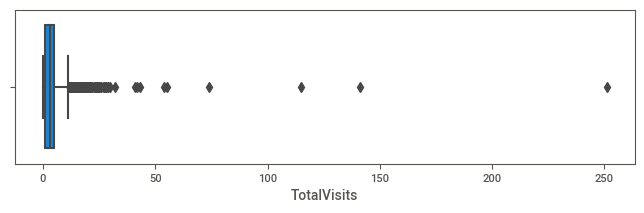

In [257]:
# Create a boxplot
plt.figure(figsize=[8, 2])
sns.boxplot(x=df['TotalVisits'])  # Assuming the corrected column name
plt.show()

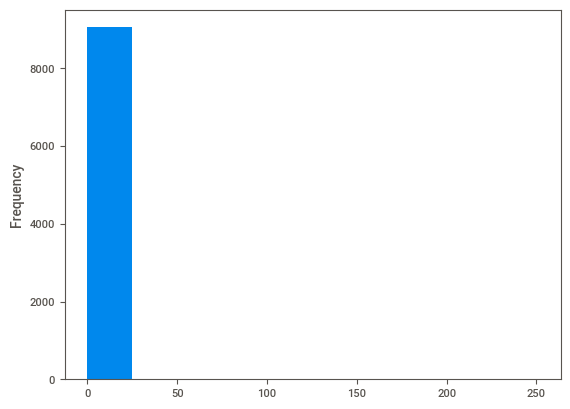

In [258]:
#plot the histogram of age variable.
df['TotalVisits'].plot.hist()
plt.show()

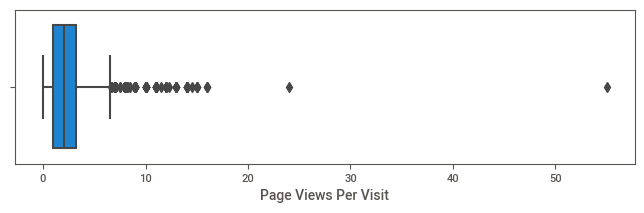

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=[8, 2])
sns.boxplot(x=df['Page Views Per Visit'])  # Assuming the corrected column name
plt.show()


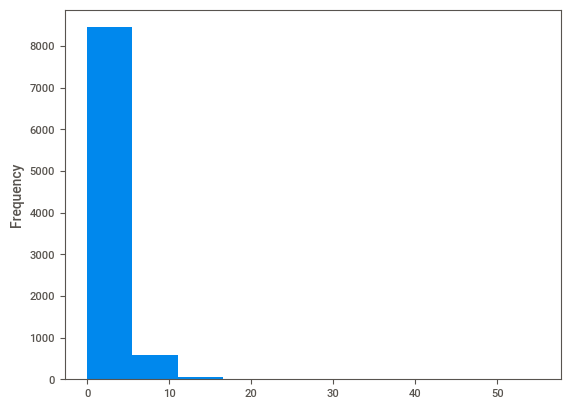

In [260]:
#plot the histogram of age variable.
df['Page Views Per Visit'].plot.hist()
plt.show()

In [261]:
!pip install sweetviz

In [262]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


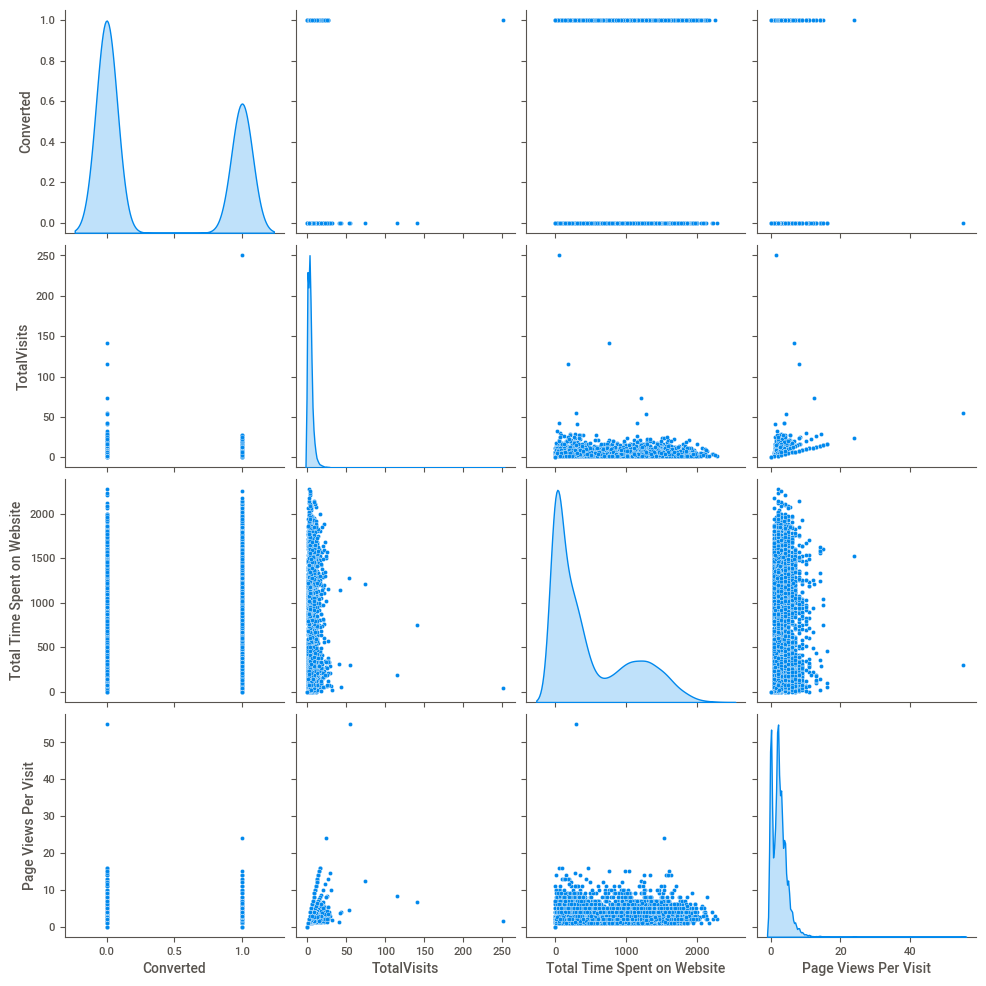

In [263]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

As one can see, there are no clear relationships and the data is skewedbecause of outliers in Total time spent on the webiste and Page per views. We shall be usinf min max scalar and if needed power transform to transform this data

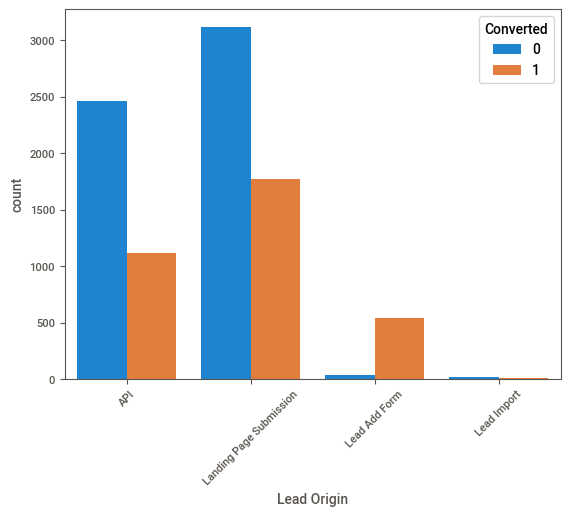

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Lead Origin", hue="Converted", data=df)
plt.xticks(rotation=45)
plt.show()


In [265]:
#Landing Page Submission has the highest conversion rate in lead origin column and also the most non conversion rate

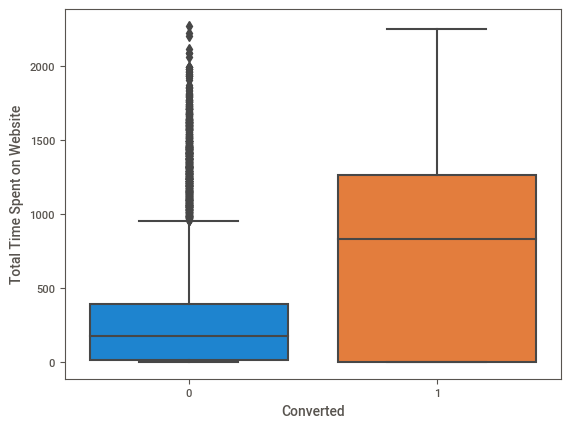

In [266]:
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=df)
plt.show()


There are more conversions for Total time spent on the website than non converted leads. Around 1300 conversions and 400 non converted leads

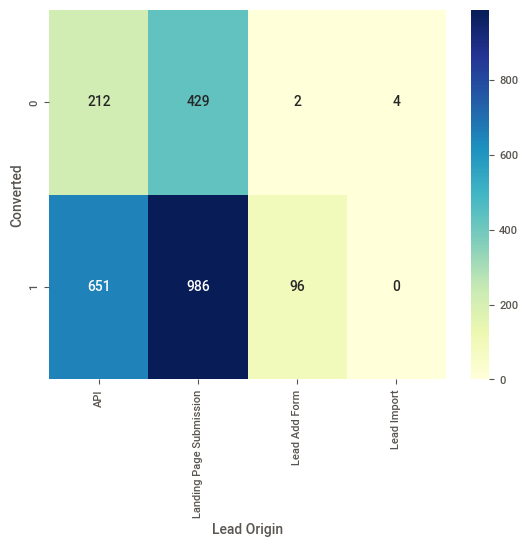

In [267]:
pivot_table = df.pivot_table(index='Converted', columns='Lead Origin', values='Total Time Spent on Website', aggfunc='mean')
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.show()



High conversion for landing page submission for lead origin column

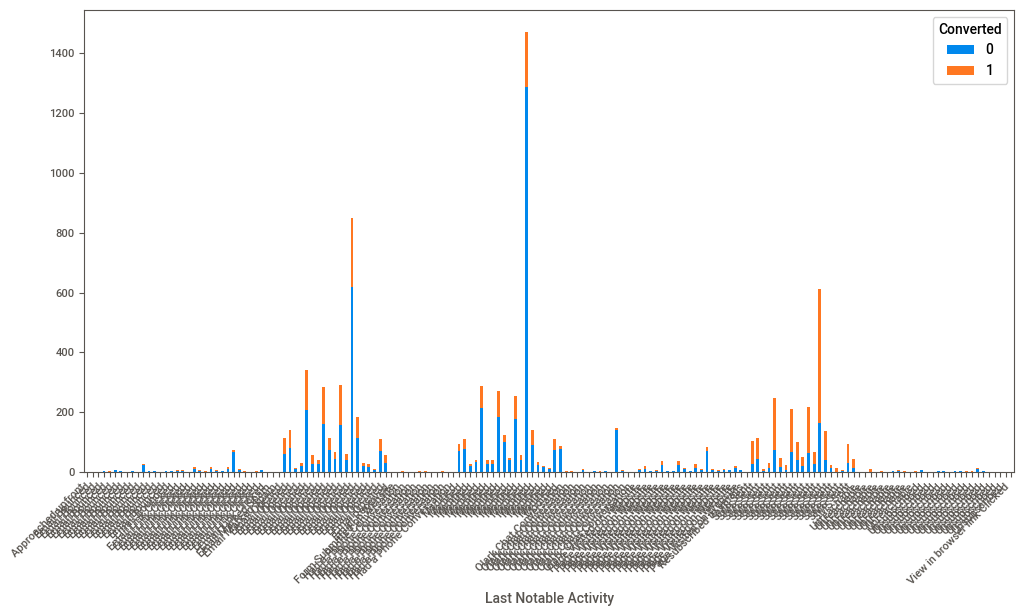

In [268]:
df_multivariate = df.groupby(['Last Notable Activity', 'Specialization', 'Converted']).size().unstack(fill_value=0).reset_index()
df_multivariate.plot(x='Last Notable Activity', kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45, ha="right")
plt.show()


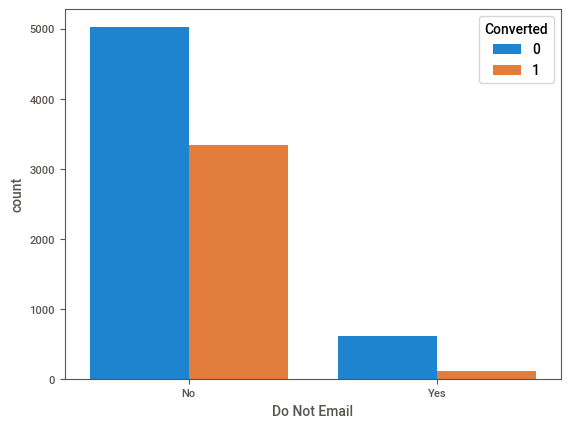

In [269]:
sns.countplot(x="Do Not Email", hue="Converted", data=df)
plt.show()


The customers who choose not to opt for email have higher conversions (3400 converted leads) than customers who opted for email(around 500 converted leads). However, in general, there are more non converted leads among the customers who opted out of email. There are 5000 cuso5mer who choose to opt out of email, out of those 5000 are non converted leads and around 3400 are converted leads.

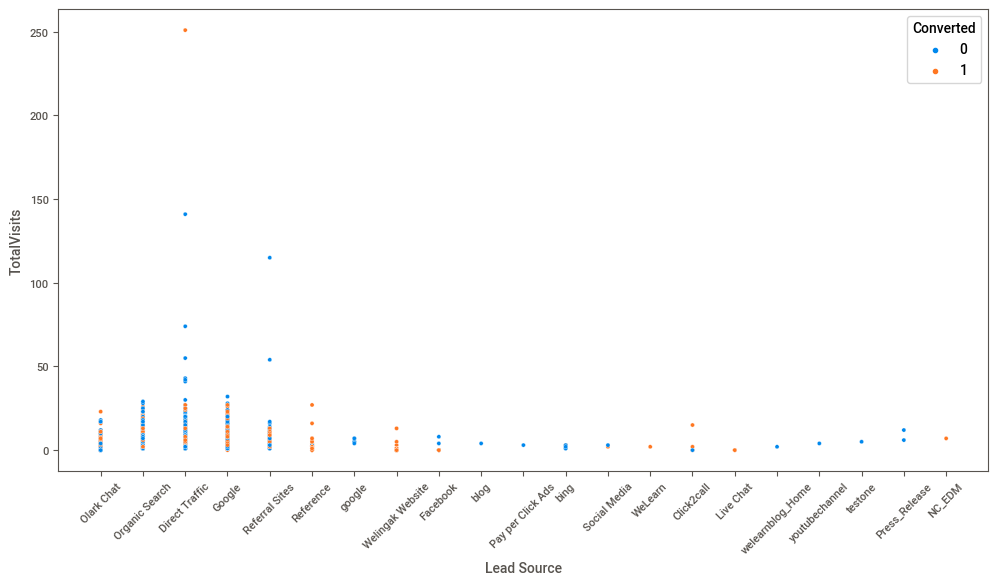

In [270]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Lead Source", y="TotalVisits", hue="Converted", data=df)
plt.xticks(rotation=45)
plt.show()


we can see highest converted leads and total visits for Google, Direct Traffic and Reference. Reference has the most converted leads and negligible non converted leads out of all the categories. We can see highest non converted leads  and total visits for Direct Traffic

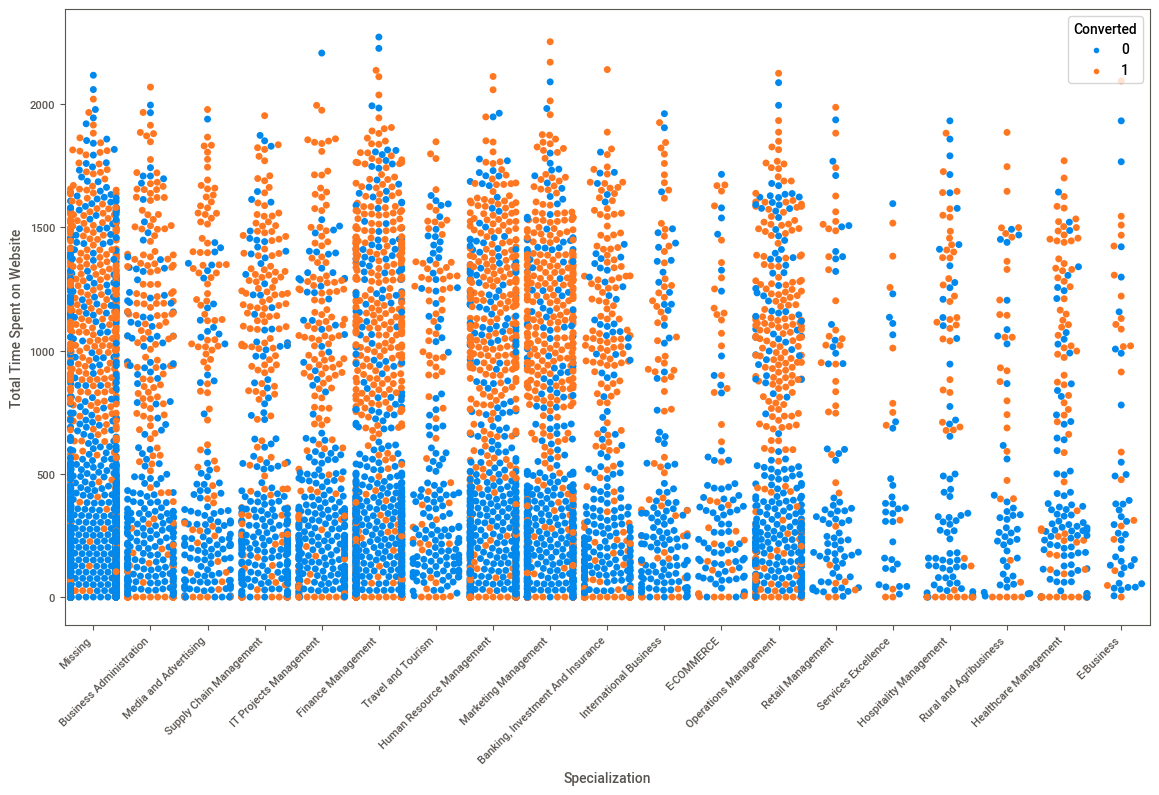

In [271]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x="Specialization", y="Total Time Spent on Website", hue="Converted", data=df)
plt.xticks(rotation=45, ha="right")
plt.show()


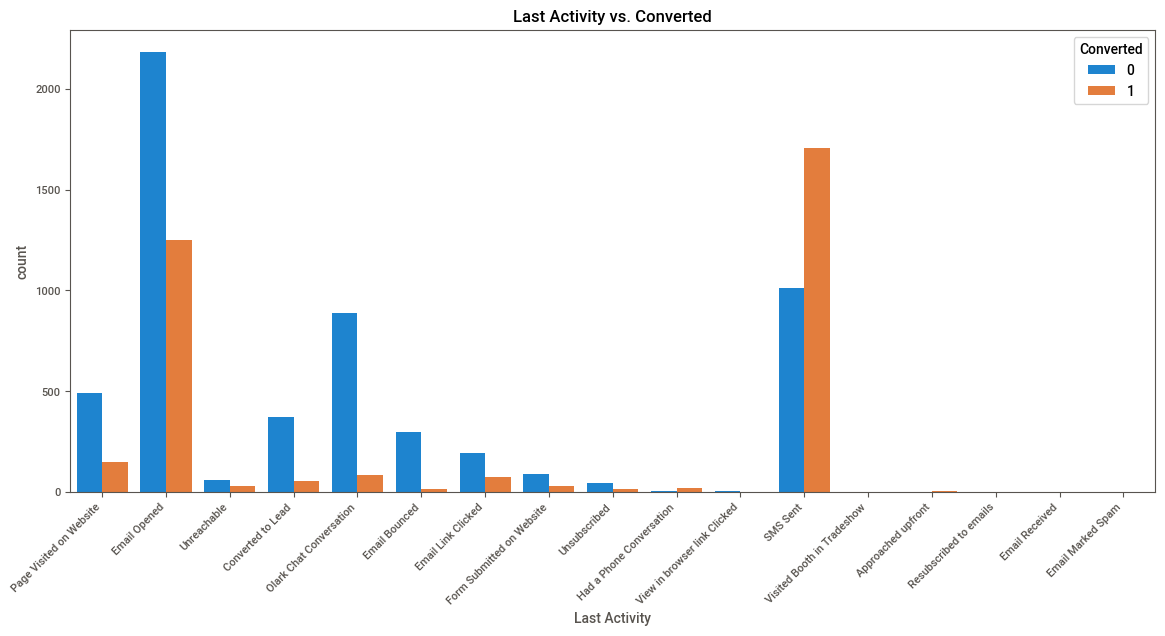

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the mentioned columns
# Example: df = pd.read_csv('your_dataset.csv')

# Bivariate relationship between Last Activity and Converted
plt.figure(figsize=(14, 6))
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.title('Last Activity vs. Converted')
plt.xticks(rotation=45, ha='right')
plt.show()


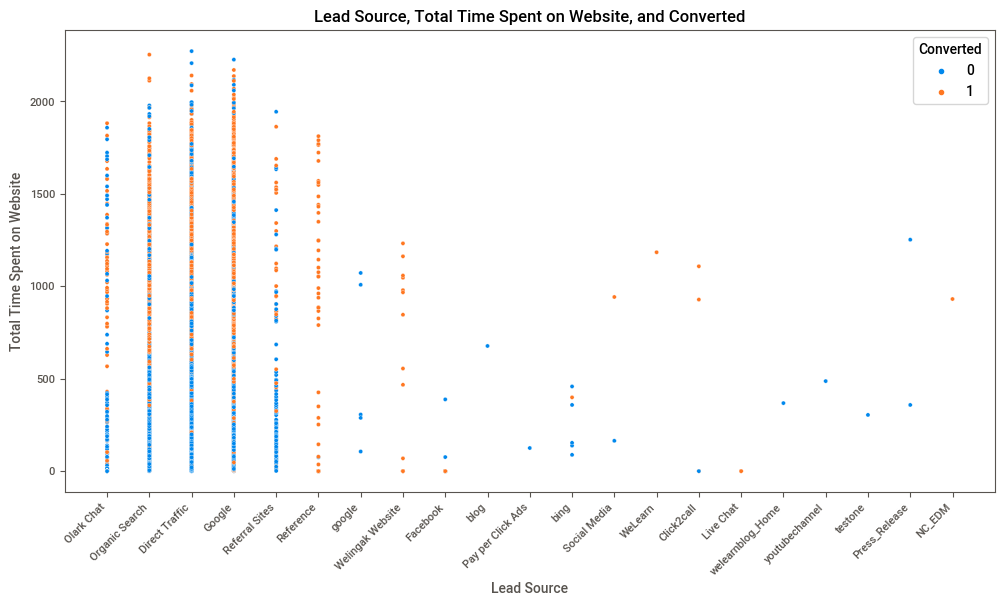

In [273]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Lead Source', y='Total Time Spent on Website', hue='Converted', data=df)
plt.title('Lead Source, Total Time Spent on Website, and Converted')
plt.xticks(rotation=45, ha='right')
plt.show()

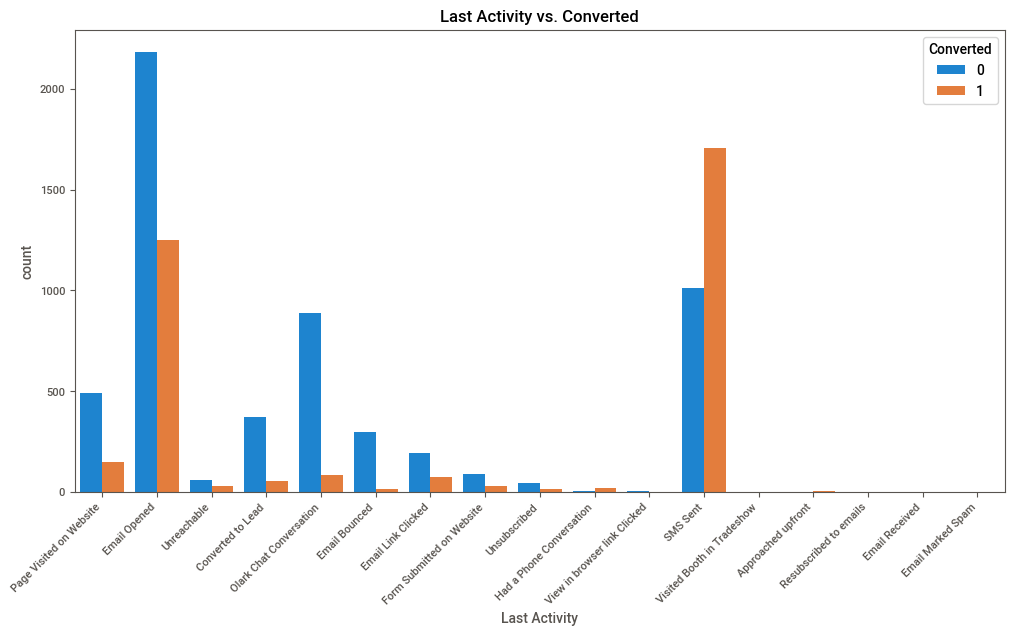

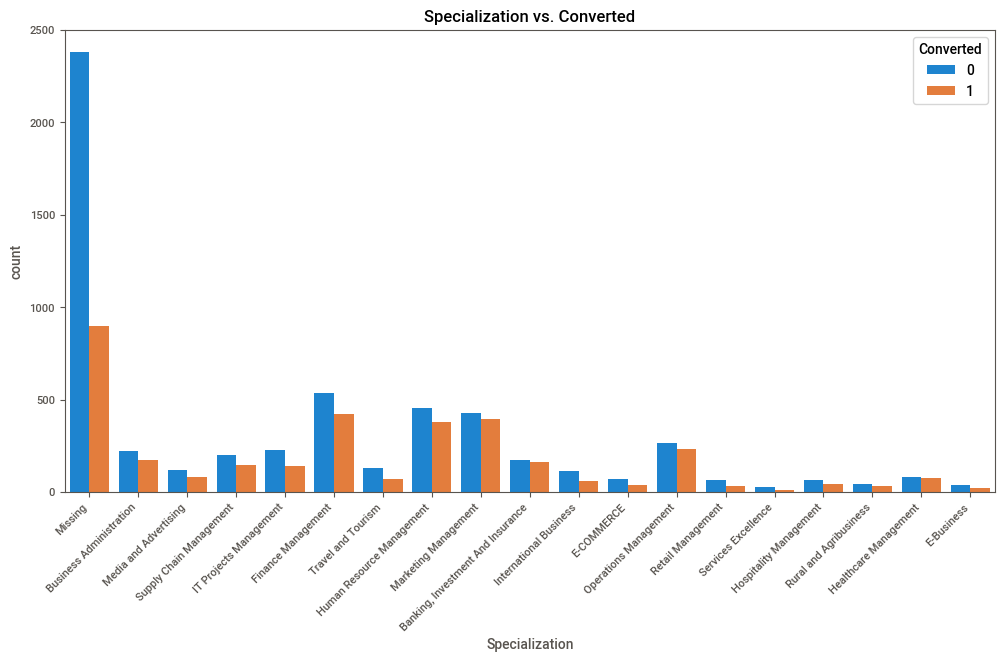

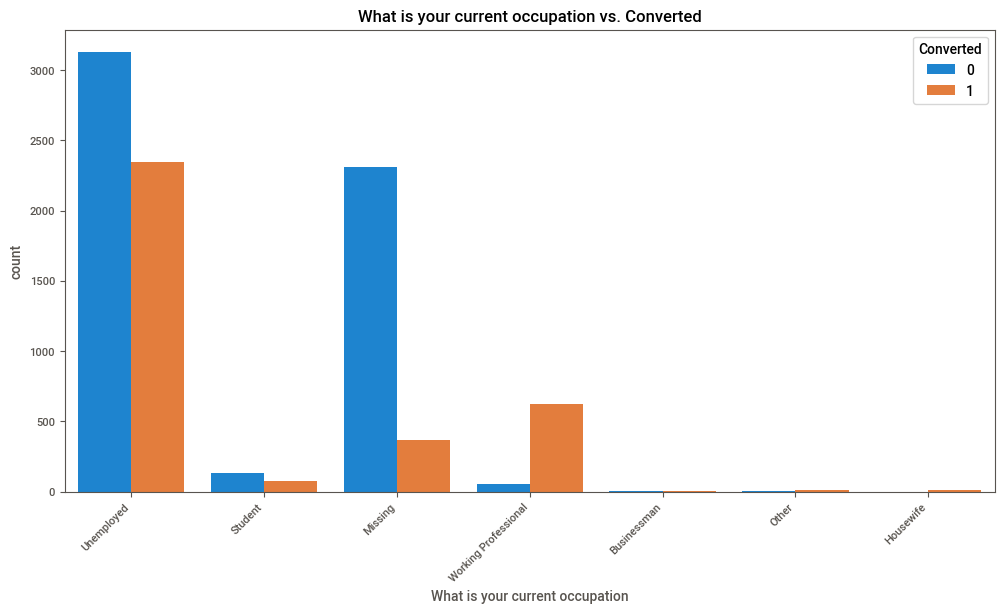

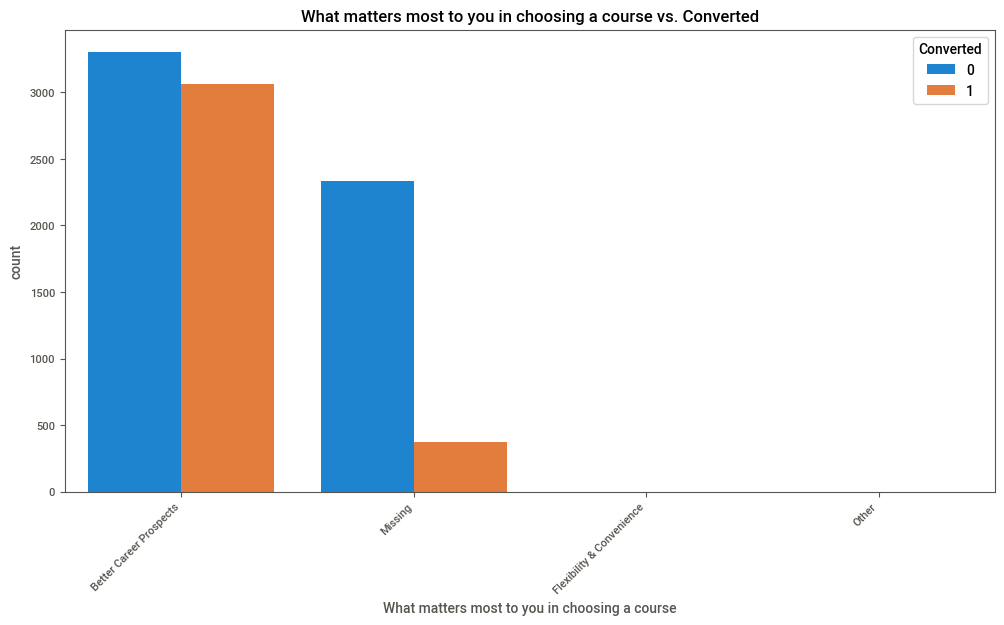

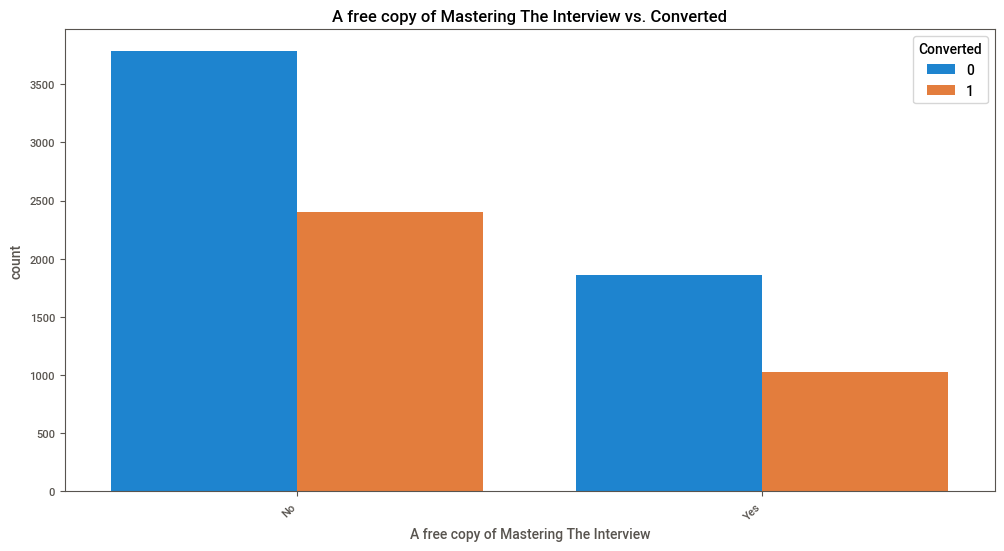

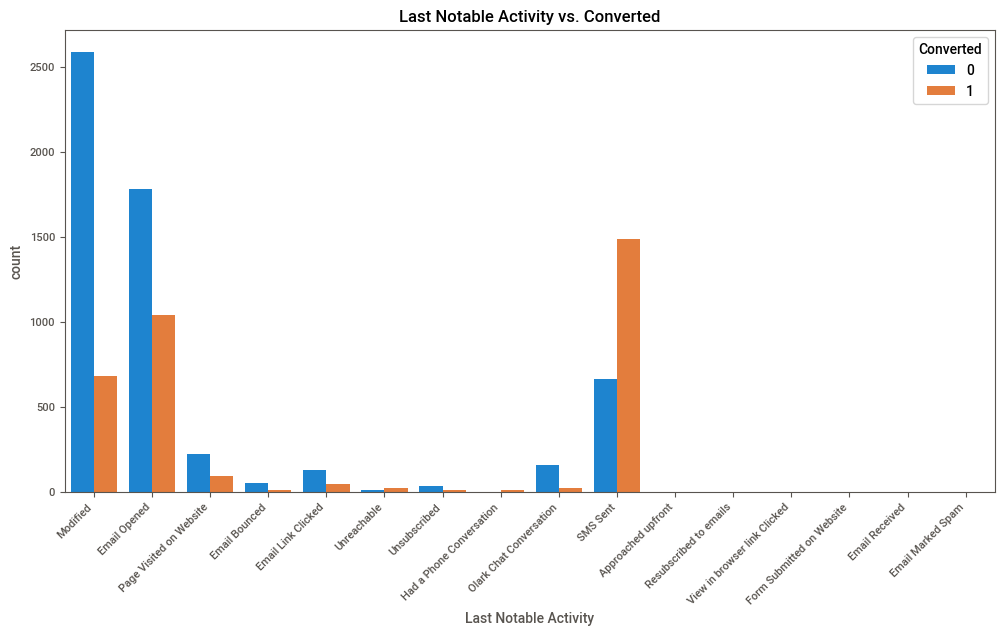

Converted                                                          0     1  \
Last Activity                Specialization                                  
Approached upfront           Marketing Management                  0     2   
                             Missing                               0     2   
                             Supply Chain Management               0     1   
Converted to Lead            Banking, Investment And Insurance    10     3   
                             Business Administration              17     2   
...                                                              ...   ...   
View in browser link Clicked Finance Management                    2     0   
                             Missing                               3     0   
                             Supply Chain Management               0     1   
Visited Booth in Tradeshow   Finance Management                    1     0   
All                                                             

In [274]:

# Bivariate relationship between each categorical column and Converted
categorical_columns = ["Last Activity", "Specialization", "What is your current occupation",
                        "What matters most to you in choosing a course",
                        "A free copy of Mastering The Interview", "Last Notable Activity"]

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='Converted', data=df)
    plt.title(f'{column} vs. Converted')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Multivariate relationship - Crosstab analysis
# Example: Last Activity, Specialization, and Converted
cross_tab_result = pd.crosstab(index=[df['Last Activity'], df['Specialization']], columns=df['Converted'], margins=True)

# Display the crosstab result
print(cross_tab_result)

# You can perform similar crosstab analysis for other combinations of columns




In [275]:
#The next step is to deal with the categorical variables
#present in the dataset. So first take a look at which variables are actually categorical variables.
#Check the columns which are of type "object"
temp = df.loc[:, df.dtypes == 'object']
temp.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [276]:
temp

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Missing,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,Email Opened,Missing,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Missing,Unemployed,Better Career Prospects,No,Modified
...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,SMS Sent,Business Administration,Unemployed,Better Career Prospects,Yes,SMS Sent
9238,Landing Page Submission,Google,No,SMS Sent,Human Resource Management,Missing,Missing,No,SMS Sent


<Figure size 1500x1000 with 0 Axes>

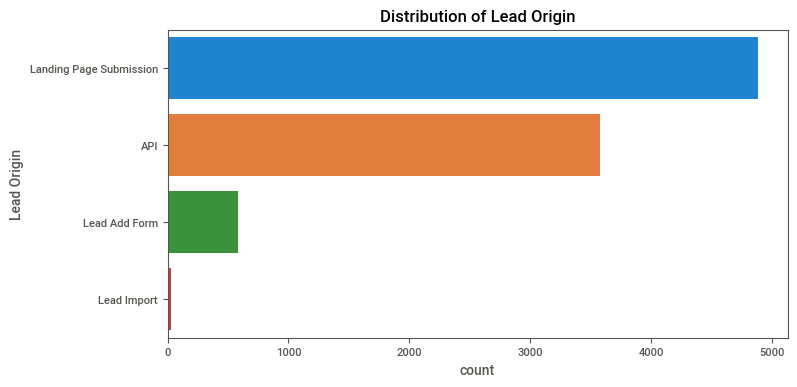

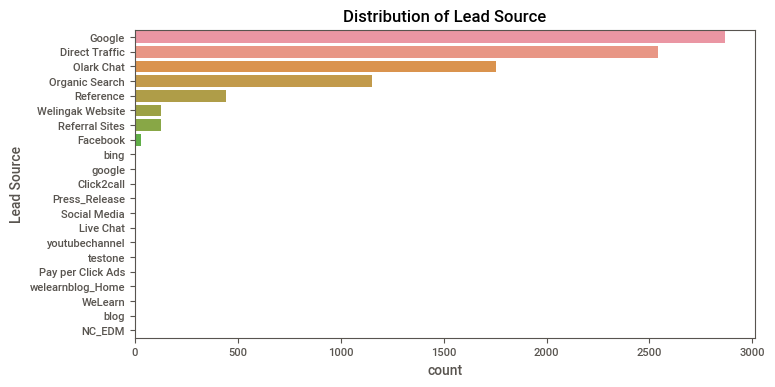

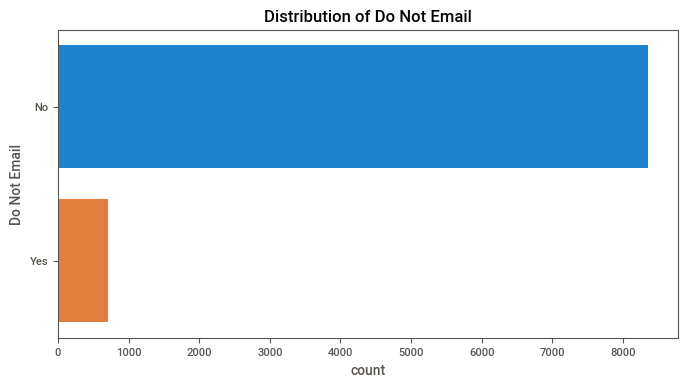

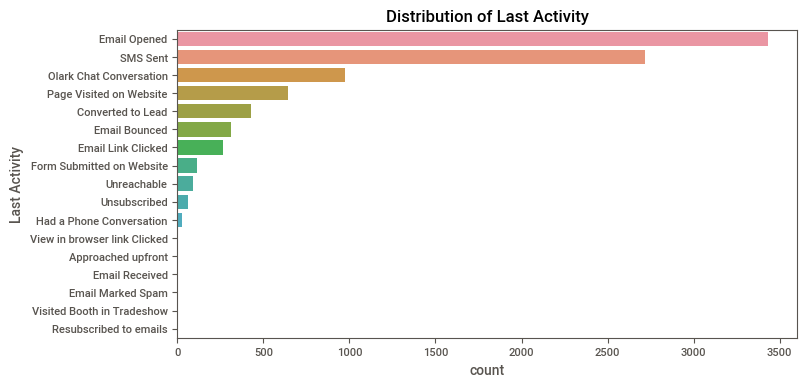

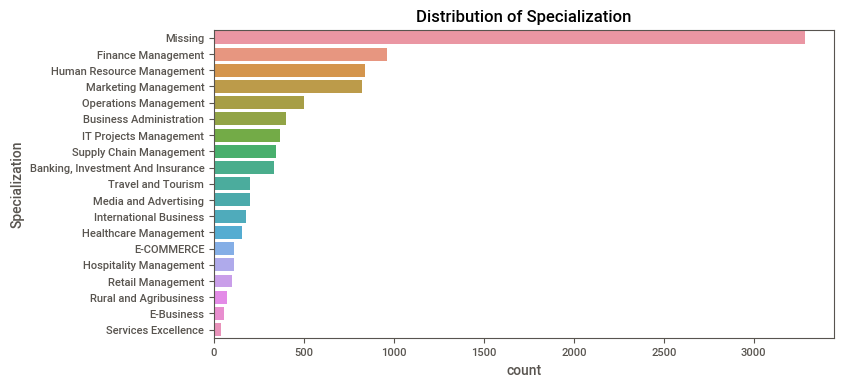

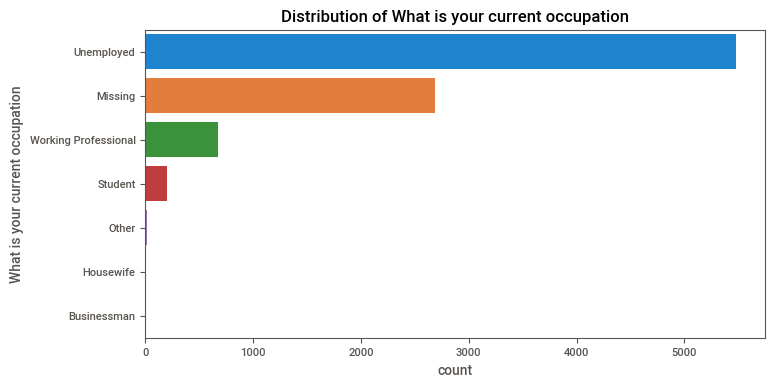

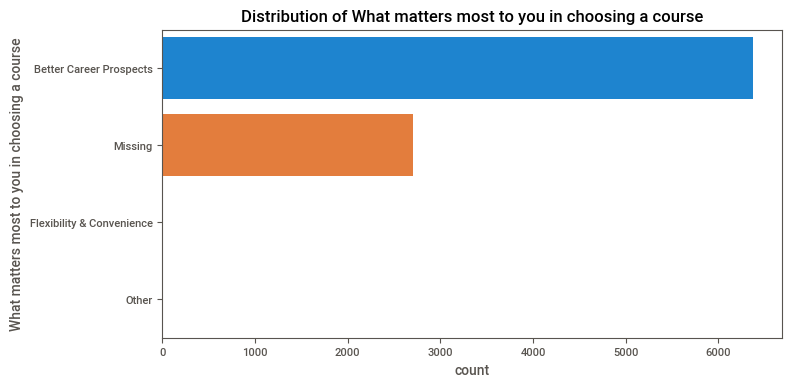

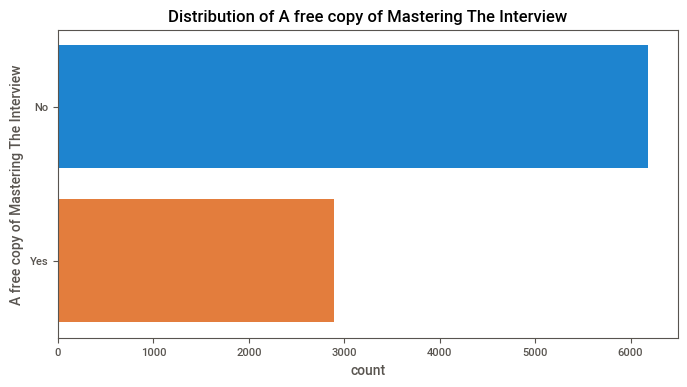

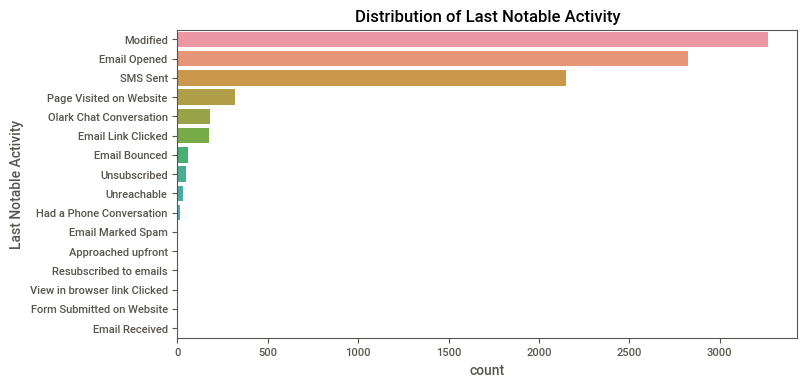

In [277]:
#univariate Analysis
#plot the bar graph of percentage job categories
# Set the figure size
# Set the figure size
plt.figure(figsize=(15, 10))

for column in temp:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()


In [278]:
# Create dummy variables for the specified columns
dummy_df = pd.get_dummies(temp, prefix=temp[:9], drop_first=True)

In [279]:
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

In [280]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Missing,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Missing,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Missing,Unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Missing,...,0,0,0,0,0,0,1,0,0,0


In [281]:
# Drop the original columns for which dummy variables were created
df = df.drop(columns=temp)

In [282]:
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


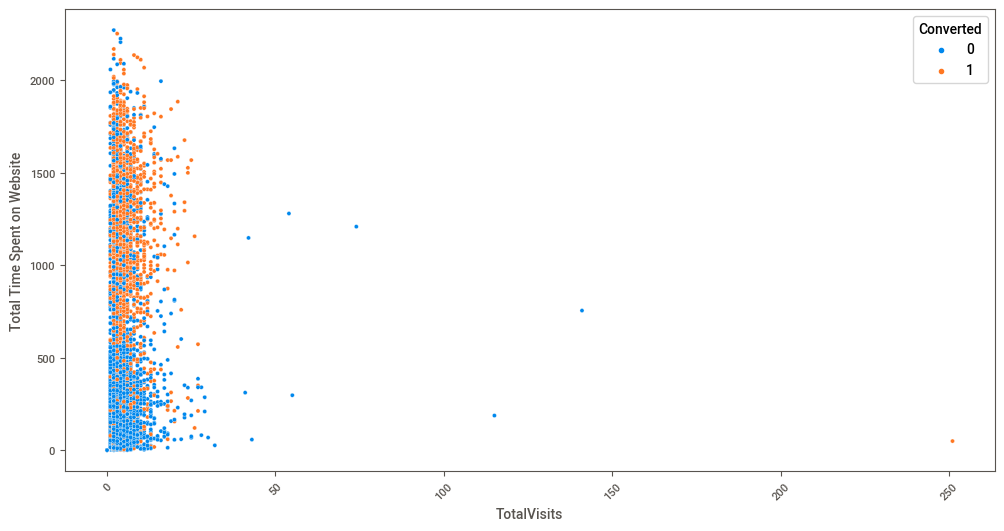

In [283]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="TotalVisits", y="Total Time Spent on Website", hue="Converted", data=df)
plt.xticks(rotation=45)
plt.show()


As we can see mst of the leads(converted and non converted have less than 40 toal visits on the webiste. Most of the leads have have less than 20 total visits. We can see that most converted leads have less than 20 Total vists and spend more than 600 minutes on the website

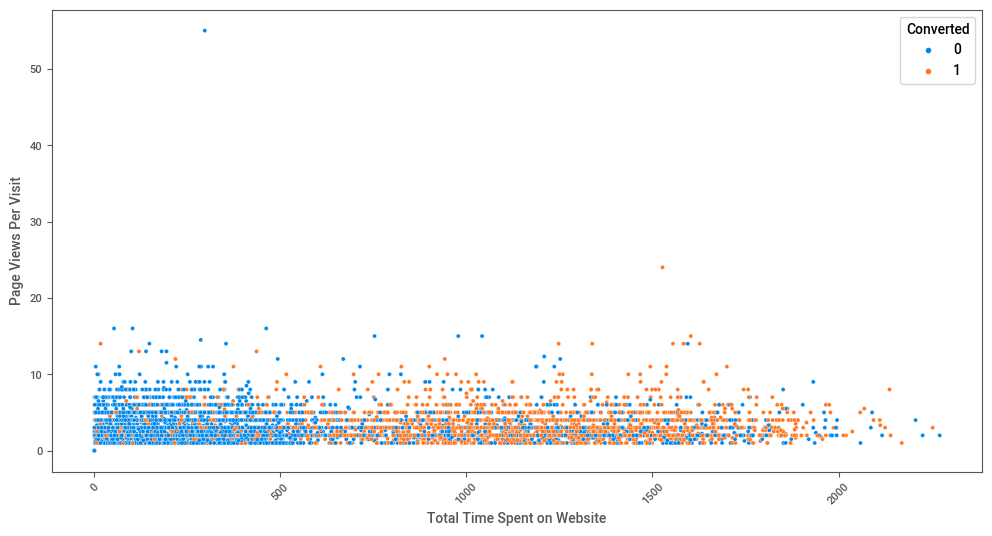

In [284]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Total Time Spent on Website", y="Page Views Per Visit", hue="Converted", data=df)
plt.xticks(rotation=45)
plt.show()

we can see more converted leads as the total time spent on the webiste increases (above 600 minutes for converted leads). They typically have 1 to 6 page views per visit on the website

In [285]:
#Import the required Library
from sklearn.model_selection import train_test_split


In [286]:
#Put all the feature variables in X
x= df.drop (['Converted'], 1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [287]:
#Put the target variable in y
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [288]:
#Split the dataset into 70% train and 30% test
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)


In [289]:
#Scaling
# There are a few numeric variables present in the dataset which have
# different scales. Scaling these variables.
from sklearn.preprocessing import MinMaxScaler

In [290]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [291]:
# Scale the three numeric features present in the dataset for (test dataset)
scaler = MinMaxScaler()
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.054054,0.069102,0.072727,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.067568,0.665933,0.090909,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.027027,0.032570,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0.108108,0.072183,0.145455,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


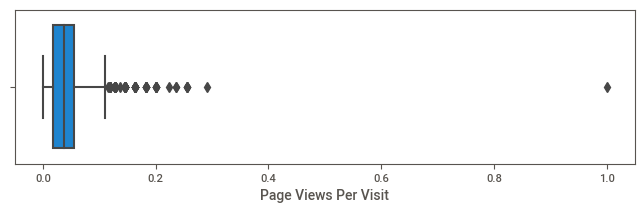

In [292]:
# Create a boxplot
plt.figure(figsize=[8, 2])
sns.boxplot(x=x_test['Page Views Per Visit'])  # Assuming the corrected column name
plt.show()

#the outliers seem to be treated for Page Views Per Visit
 #(see previous box plot for Page Views Per Visit)

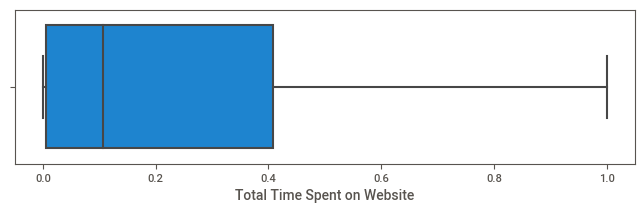

In [293]:
# Create a boxplot
plt.figure(figsize=[8, 2])
sns.boxplot(x=x_test['Total Time Spent on Website'])  # Assuming the corrected column name
plt.show()


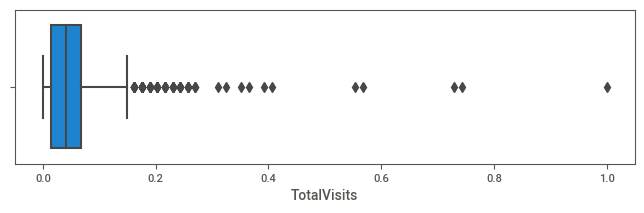

In [222]:
# Create a boxplot
plt.figure(figsize=[8, 2])
sns.boxplot(x=x_test['TotalVisits'])  # Assuming the corrected column name
plt.show()

In [68]:
x_test['Total Time Spent on Website'].describe()

count    2723.000000
mean        0.211043
std         0.240212
min         0.000000
25%         0.005282
50%         0.106074
75%         0.408451
max         1.000000
Name: Total Time Spent on Website, dtype: float64

In [70]:
### Checking the conversion_rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

37.85541106458012

The conversion rate is almost 38%

In [71]:
df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

Target column seems to be fairly balanced

In [72]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,-0.003146,0.022317,-0.107875,-0.037993,0.227450,-0.007468,-0.001620,0.005513,0.003061,0.009819
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,-0.001798,0.013928,-0.096466,-0.088593,0.026102,-0.011516,0.059445,0.019415,0.021668,0.001457
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.009722,0.002608,-0.084643,-0.118758,0.043041,-0.011337,0.052736,-0.000847,0.018171,-0.011337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013451,-0.007468,-0.009298,-0.011516,-0.011337,-0.002746,-0.000605,-0.006551,-0.000615,-0.007137,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,0.360233,-0.001620,0.137169,0.059445,0.052736,0.115585,-0.027600,0.016095,-0.023765,-0.001771,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,0.037893,0.005513,0.009594,0.019415,-0.000847,0.007222,-0.003426,-0.016425,-0.003483,0.011539,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,-0.016286,0.003061,0.003951,0.021668,0.018171,-0.018465,-0.004066,0.004851,-0.004133,-0.000753,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


In [73]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a correlation threshold
threshold = 0.70

# Find pairs of highly correlated columns
highly_correlated_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1)

# Extract the column names for highly correlated pairs
highly_correlated_columns = [col for col in correlation_matrix.columns if any(highly_correlated_pairs[col])]

# Calculate the absolute correlation values for highly correlated columns
absolute_correlation_values = correlation_matrix.loc[highly_correlated_columns, highly_correlated_columns].abs()

# Flatten the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle_values = absolute_correlation_values.where(np.triu(np.ones(absolute_correlation_values.shape), k=1).astype(np.bool))

# Stack and sort the absolute correlation values
sorted_correlation_values = upper_triangle_values.stack().sort_values(ascending=False)

# Display the highly correlated columns and their absolute correlation values in ascending order
print("Highly Correlated Columns and Their Absolute Correlation Values (in ascending order):")
for (col1, col2), value in sorted_correlation_values.iteritems():
    print(f"{col1} - {col2}: {value}")

Highly Correlated Columns and Their Absolute Correlation Values (in ascending order):
What is your current occupation_Missing - What matters most to you in choosing a course_Missing: 0.9949955508337289
Lead Origin_Lead Import - Lead Source_Facebook: 0.983684365907892
Last Activity_Unsubscribed - Last Notable Activity_Unsubscribed: 0.8726564240440919
Lead Origin_Lead Add Form - Lead Source_Reference: 0.8661912666504402
Last Activity_Email Opened - Last Notable Activity_Email Opened: 0.8616355139692862
Last Activity_SMS Sent - Last Notable Activity_SMS Sent: 0.8531015185251231
What is your current occupation_Unemployed - What matters most to you in choosing a course_Missing: 0.8028594223007554
Last Activity_Email Link Clicked - Last Notable Activity_Email Link Clicked: 0.8006856010417477
What is your current occupation_Missing - What is your current occupation_Unemployed: 0.7993317573687951
Lead Origin_Landing Page Submission - Specialization_Missing: 0.7553813690554206
Last Activity_Had

In [ ]:
#Highly Correlated Columns and Their Absolute Correlation Values (in ascending order):
#What is your current occupation_Missing - What matters most to you in choosing a course_Missing: 0.9949955508337289
#Lead Origin_Lead Import - Lead Source_Facebook: 0.983684365907892
#Last Activity_Unsubscribed - Last Notable Activity_Unsubscribed: 0.8726564240440919
#Lead Origin_Lead Add Form - Lead Source_Reference: 0.8661912666504402
#Last Activity_Email Opened - Last Notable Activity_Email Opened: 0.8616355139692862
#Last Activity_SMS Sent - Last Notable Activity_SMS Sent: 0.8531015185251231
#What is your current occupation_Unemployed - What matters most to you in choosing a course_Missing: 0.8028594223007554
#Last Activity_Email Link Clicked - Last Notable Activity_Email Link Clicked: 0.8006856010417477
#What is your current occupation_Missing - What is your current occupation_Unemployed: 0.7993317573687951
#Lead Origin_Landing Page Submission - Specialization_Missing: 0.7553813690554206
#Last Activity_Had a Phone Conversation - Last Notable Activity_Had a Phone Conversation: 0.747877054267756
#Last Activity_Email Received - Last Notable Activity_Email Received: 0.7070678124735487

In [74]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
import statsmodels.api as sm

In [76]:
#Import 'LogisticRegression and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [77]:
#Import RFE and select 15 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming logreg is your logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select (15 in this case)
num_features_to_select = 15

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=num_features_to_select)

# Fit RFE on your training data
rfe.fit(x_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [78]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False])

In [79]:
# Let's take a look at which features have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 72),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 68),
 ('Lead Source_blog', False, 41),
 ('Lead Source_google', False, 38),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearnblog_Home', False, 50),
 (

In [80]:
col = x_train.columns[rfe.support_]

In [81]:
x_train=x_train[col]

In [82]:
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Tue, 19 Dec 2023   Deviance:                       5133.8
Time:                        10:05:47   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4083
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2051      0.086    -25.497      0.000      -2.375      -2.036
TotalVisits                                               6.4707      2.078      3.114      0.002       2.399      10.543
Total Time Spent on Website                               4.6319      0.167     27.692      0.000       4.304       4.960
Lead Origin_Lead Add Form                                 3.6928      0.225     16.449      0.000       3.253       4.133
Lead Source_Olark Chat                                    1.5405      0.113     13.628      0.000       1.319       1.762
Lead Source_Welingak Website                              1.9992      0.752      2.660      0.008       0.526       3.472
Do Not Email_Yes                                         -1.6471      0.172     -9.578      0.000      -1.984      -1.310
Last Activity_Converted to Lead                          -1.2150      0.226     -5.369      0.000      -1.659      -0.771
Last Activity_Had a Phone Conversation                    1.2659      1.167      1.085      0.278      -1.021       3.553
Last Activity_Olark Chat Conversation                    -1.3418      0.165     -8.154      0.000      -1.664      -1.019
Last Activity_SMS Sent                                    1.2515      0.076     16.519      0.000       1.103       1.400
What is your current occupation_Housewife                22.7197   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Working Professional      2.5190      0.190     13.287      0.000       2.147       2.891
What matters most to you in choosing a course_Missing    -1.3108      0.088    -14.843      0.000      -1.484      -1.138
Last Notable Activity_Had a Phone Conversation            2.2949      1.618      1.418      0.156      -0.876       5.466
Last Notable Activity_Unreachable                         2.0210      0.494      4.089      0.000       1.052       2.990
=========================================================================================================================
"""

In [83]:
#checking VIF
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,3.41
13,Last Notable Activity_Had a Phone Conversation,3.40
1,Total Time Spent on Website,1.66
3,Lead Source_Olark Chat,1.52
2,Lead Origin_Lead Add Form,1.50
9,Last Activity_SMS Sent,1.47
12,What matters most to you in choosing a course_...,1.42
8,Last Activity_Olark Chat Conversation,1.41
0,TotalVisits,1.39
4,Lead Source_Welingak Website,1.33


In [85]:
# Getting the predicted values on the train set
# Add a constant to the x_test matrix
x_train_sm = sm.add_constant(x_train)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_train_sm.shape[1])
print("Number of coefficients in the model:", len(res.params))

# Predict probabilities on the test set
y_train_pred = res.predict(x_train_sm)

# Display the first 10 predicted probabilities
print(y_train_pred[:10])

Number of columns in x_test_sm: 16
Number of coefficients in the model: 16
3009    0.066716
1012    0.100019
9226    0.642642
4750    0.658956
7987    0.922102
1281    0.767991
2880    0.031364
4971    0.916354
7536    0.884894
1248    0.901401
dtype: float64


In [86]:
#reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06671631, 0.10001889, 0.64264224, 0.658956  , 0.92210236,
       0.76799093, 0.03136381, 0.91635407, 0.88489419, 0.9014013 ])

In [87]:
#creating a dataframe with conversion flag n predicted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.066716
1,0,0.100019
2,0,0.642642
3,1,0.658956
4,1,0.922102


In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,predicted
0,0,0.066716,0
1,0,0.100019,0
2,0,0.642642,1
3,1,0.658956,1
4,1,0.922102,1


In [91]:
from sklearn import metrics

In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3458  447]
 [ 739 1707]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8132577546843017


#all variables seem to have a low VIF, which is good to predict data

In [94]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Tue, 19 Dec 2023   Deviance:                       5133.8
Time:                        10:06:52   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4083
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2051      0.086    -25.497      0.000      -2.375      -2.036
TotalVisits                                               6.4707      2.078      3.114      0.002       2.399      10.543
Total Time Spent on Website                               4.6319      0.167     27.692      0.000       4.304       4.960
Lead Origin_Lead Add Form                                 3.6928      0.225     16.449      0.000       3.253       4.133
Lead Source_Olark Chat                                    1.5405      0.113     13.628      0.000       1.319       1.762
Lead Source_Welingak Website                              1.9992      0.752      2.660      0.008       0.526       3.472
Do Not Email_Yes                                         -1.6471      0.172     -9.578      0.000      -1.984      -1.310
Last Activity_Converted to Lead                          -1.2150      0.226     -5.369      0.000      -1.659      -0.771
Last Activity_Had a Phone Conversation                    1.2659      1.167      1.085      0.278      -1.021       3.553
Last Activity_Olark Chat Conversation                    -1.3418      0.165     -8.154      0.000      -1.664      -1.019
Last Activity_SMS Sent                                    1.2515      0.076     16.519      0.000       1.103       1.400
What is your current occupation_Housewife                22.7197   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Working Professional      2.5190      0.190     13.287      0.000       2.147       2.891
What matters most to you in choosing a course_Missing    -1.3108      0.088    -14.843      0.000      -1.484      -1.138
Last Notable Activity_Had a Phone Conversation            2.2949      1.618      1.418      0.156      -0.876       5.466
Last Notable Activity_Unreachable                         2.0210      0.494      4.089      0.000       1.052       2.990
=========================================================================================================================
"""

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Assuming x_test[col] is your DataFrame
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor (x_train.values, i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values (by = "VIF", ascending = False)
vif

# Sort by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

                                             Features   VIF
7              Last Activity_Had a Phone Conversation  3.41
13     Last Notable Activity_Had a Phone Conversation  3.40
1                         Total Time Spent on Website  1.66
3                              Lead Source_Olark Chat  1.52
2                           Lead Origin_Lead Add Form  1.50
9                              Last Activity_SMS Sent  1.47
12  What matters most to you in choosing a course_...  1.42
8               Last Activity_Olark Chat Conversation  1.41
0                                         TotalVisits  1.39
4                        Lead Source_Welingak Website  1.33
11  What is your current occupation_Working Profes...  1.19
5                                    Do Not Email_Yes  1.07
6                     Last Activity_Converted to Lead  1.04
10          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01


In [98]:
x_train.drop("Last Activity_Had a Phone Conversation", axis=1, inplace=True)

In [99]:
# Let's re-run the model using the selected variables
#assessing with stat model
x_train_sm = sm.add_constant(x_train)
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.5
Date:                Tue, 19 Dec 2023   Deviance:                       5135.1
Time:                        10:10:48   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2029      0.086    -25.483      0.000      -2.372      -2.033
TotalVisits                                               6.4862      2.078      3.122      0.002       2.414      10.559
Total Time Spent on Website                               4.6330      0.167     27.705      0.000       4.305       4.961
Lead Origin_Lead Add Form                                 3.6914      0.224     16.444      0.000       3.251       4.131
Lead Source_Olark Chat                                    1.5396      0.113     13.622      0.000       1.318       1.761
Lead Source_Welingak Website                              1.9993      0.752      2.660      0.008       0.526       3.472
Do Not Email_Yes                                         -1.6465      0.172     -9.572      0.000      -1.984      -1.309
Last Activity_Converted to Lead                          -1.2174      0.226     -5.380      0.000      -1.661      -0.774
Last Activity_Olark Chat Conversation                    -1.3433      0.165     -8.163      0.000      -1.666      -1.021
Last Activity_SMS Sent                                    1.2493      0.076     16.497      0.000       1.101       1.398
What is your current occupation_Housewife                22.7174   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Working Professional      2.5172      0.190     13.279      0.000       2.146       2.889
What matters most to you in choosing a course_Missing    -1.3123      0.088    -14.862      0.000      -1.485      -1.139
Last Notable Activity_Had a Phone Conversation            3.5585      1.123      3.168      0.002       1.357       5.760
Last Notable Activity_Unreachable                         2.0192      0.494      4.085      0.000       1.050       2.988
=========================================================================================================================
"""

In [100]:
# Getting the predicted values on the train set
# Add a constant to the x_test matrix
x_train_sm = sm.add_constant(x_train)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_train_sm.shape[1])
print("Number of coefficients in the model:", len(res4.params))

# Predict probabilities on the test set
y_train_pred = res4.predict(x_train_sm)

# Display the first 10 predicted probabilities
print(y_train_pred[:10])

Number of columns in x_test_sm: 15
Number of coefficients in the model: 15
3009    0.066778
1012    0.099990
9226    0.642445
4750    0.658802
7987    0.922183
1281    0.768126
2880    0.031390
4971    0.916447
7536    0.885248
1248    0.901480
dtype: float64


In [101]:
y_train_pred = res4.predict(x_train_sm).values.reshape(-1)

In [104]:
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3458  447]
 [ 739 1707]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8132577546843017


The accuracy has barly increased and is almost the same even after dropping a column, whuch had 3.4

In [106]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6978740801308259

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8855313700384123

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11446862996158771


In [110]:
# positive predictive value
print (TP / float(TP+FP))

0.7924791086350975


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8239218489397189


In [112]:
#plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

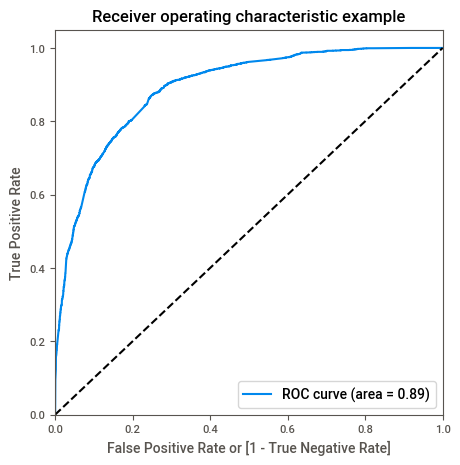

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [115]:
#finding optimal cut off point
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066716,0,1,0,0,0,0,0,0,0,0,0
1,0,0.100019,0,1,1,0,0,0,0,0,0,0,0
2,0,0.642642,1,1,1,1,1,1,1,1,0,0,0
3,1,0.658956,1,1,1,1,1,1,1,1,0,0,0
4,1,0.922102,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.605259  0.984464  0.367734
0.2   0.2  0.764132  0.917825  0.667862
0.3   0.3  0.793103  0.877760  0.740077
0.4   0.4  0.811368  0.769011  0.837900
0.5   0.5  0.813258  0.697874  0.885531
0.6   0.6  0.808534  0.638185  0.915237
0.7   0.7  0.783971  0.523303  0.947247
0.8   0.8  0.763974  0.437040  0.968758
0.9   0.9  0.714061  0.279640  0.986172


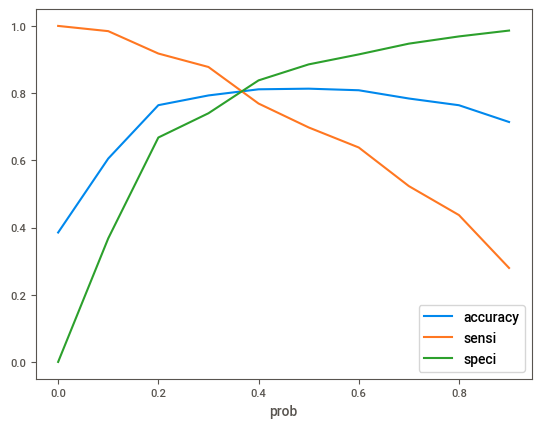

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

around 0.38 seems to be the optimal point for cutt off

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066716,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.100019,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.642642,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.658956,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.922102,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8104235553456148

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3250,  655],
       [ 549, 1897]])

In [121]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#we can use either confusion 2 .

In [1]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


NameError: ignored

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

using test data

In [122]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.054054,0.069102,0.072727,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.067568,0.665933,0.090909,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.027027,0.032570,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0.108108,0.072183,0.145455,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
x_test['Page Views Per Visit']

3271    0.072727
1490    0.090909
7936    0.036364
4216    0.000000
3830    0.145455
          ...   
850     0.027273
2879    0.036364
6501    0.145455
7155    0.054545
376     0.072727
Name: Page Views Per Visit, Length: 2723, dtype: float64

In [124]:
#Import RFE and select 15 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming logreg is your logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select (15 in this case)
num_features_to_select = 15

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=num_features_to_select)

# Fit RFE on your training data
rfe.fit(x_test, y_test)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [ ]:
# Let's take a look at which features have been selected by RFE
list(zip(x_test.columns, rfe.support_, rfe.ranking_))

In [126]:
col = x_test.columns[rfe.support_]

In [127]:
x_test=x_test[col]

In [128]:
import statsmodels.api as sm

In [129]:
#assessing with stat model
x_test_sm = sm.add_constant(x_test)
logm2 = sm.GLM(y_test,x_test_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2723
Model:                            GLM   Df Residuals:                     2707
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.8
Date:                Tue, 19 Dec 2023   Deviance:                       2199.5
Time:                        10:15:10   Pearson chi2:                 2.79e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.4625      0.215     -6.794      0.000      -1.884      -1.041
TotalVisits                                               2.1936      1.016      2.160      0.031       0.203       4.184
Total Time Spent on Website                               4.3518      0.254     17.161      0.000       3.855       4.849
Lead Origin_Landing Page Submission                      -0.8433      0.199     -4.243      0.000      -1.233      -0.454
Lead Origin_Lead Add Form                                 3.5975      0.419      8.594      0.000       2.777       4.418
Lead Source_Olark Chat                                    1.2391      0.195      6.356      0.000       0.857       1.621
Lead Source_Welingak Website                             21.6211   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
Do Not Email_Yes                                         -1.1080      0.251     -4.411      0.000      -1.600      -0.616
Last Activity_Had a Phone Conversation                    1.4455      0.950      1.521      0.128      -0.417       3.308
Last Activity_Olark Chat Conversation                    -1.4073      0.268     -5.248      0.000      -1.933      -0.882
Specialization_Missing                                   -0.8491      0.190     -4.459      0.000      -1.222      -0.476
Specialization_Rural and Agribusiness                     1.2152      0.617      1.971      0.049       0.007       2.424
What is your current occupation_Missing                  19.5565    3.4e+04      0.001      1.000   -6.65e+04    6.66e+04
What is your current occupation_Working Professional      2.5420      0.309      8.219      0.000       1.936       3.148
What matters most to you in choosing a course_Missing   -20.5860    3.4e+04     -0.001      1.000   -6.66e+04    6.65e+04
Last Notable Activity_SMS Sent                            1.5252      0.124     12.342      0.000       1.283       1.767
=========================================================================================================================
"""

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_test[col].columns
vif['VIF'] = [variance_inflation_factor(x_test[col].values, i) for i in range(x_test[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What matters most to you in choosing a course_...,170.53
11,What is your current occupation_Missing,168.91
2,Lead Origin_Landing Page Submission,2.70
9,Specialization_Missing,2.54
0,TotalVisits,2.08
1,Total Time Spent on Website,2.08
4,Lead Source_Olark Chat,2.06
8,Last Activity_Olark Chat Conversation,1.48
14,Last Notable Activity_SMS Sent,1.39
3,Lead Origin_Lead Add Form,1.37


In [131]:
x_test.drop("What is your current occupation_Missing", axis=1, inplace=True)


In [132]:
x_test.drop("What matters most to you in choosing a course_Missing", axis=1, inplace=True)


In [133]:

# Assuming x_test_sm is your design matrix with a constant term added
logm3 = sm.GLM(y_test, x_test_sm, family=sm.families.Binomial())  # Add alpha for regularization
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2723
Model:                            GLM   Df Residuals:                     2707
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.8
Date:                Tue, 19 Dec 2023   Deviance:                       2199.5
Time:                        10:16:07   Pearson chi2:                 2.79e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Assuming x_test[col] is your DataFrame
vif = pd.DataFrame()
vif['Features'] = x_test.columns
vif['VIF'] = [variance_inflation_factor (x_test.values, i) for i in range (x_test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values (by = "VIF", ascending = False)
vif

# Sort by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)


                                             Features   VIF
2                 Lead Origin_Landing Page Submission  2.47
9                              Specialization_Missing  2.24
1                         Total Time Spent on Website  2.08
0                                         TotalVisits  2.07
4                              Lead Source_Olark Chat  2.03
8               Last Activity_Olark Chat Conversation  1.47
3                           Lead Origin_Lead Add Form  1.37
12                     Last Notable Activity_SMS Sent  1.37
5                        Lead Source_Welingak Website  1.28
11  What is your current occupation_Working Profes...  1.19
6                                    Do Not Email_Yes  1.11
7              Last Activity_Had a Phone Conversation  1.01
10              Specialization_Rural and Agribusiness  1.01


In [138]:
# Assuming x_test_sm is your design matrix with a constant term added
logm5 = sm.GLM(y_test, x_test_sm, family=sm.families.Binomial())  # Add alpha for regularization
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2723
Model:                            GLM   Df Residuals:                     2709
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1131.4
Date:                Tue, 19 Dec 2023   Deviance:                       2262.9
Time:                        10:22:30   Pearson chi2:                 2.80e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3809
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [139]:
# Assuming you have already trained the model and obtained 'res'
# Add a constant to the x_test matrix
x_test_sm = sm.add_constant(x_test)

# Check the number of columns in x_test_sm and the model's params
print("Number of columns in x_test_sm:", x_test_sm.shape[1])
print("Number of coefficients in the model:", len(res5.params))

# Predict probabilities on the test set
y_test_pred = res5.predict(x_test_sm)

# Display the first 10 predicted probabilities
print(y_test_pred[:10])

Number of columns in x_test_sm: 14
Number of coefficients in the model: 14
3271    0.094893
1490    0.963176
7936    0.077527
4216    0.901301
3830    0.120283
1800    0.630778
6507    0.354761
4821    0.234996
4223    0.940263
4714    0.182098
dtype: float64


In [140]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.09489331, 0.96317635, 0.07752699, 0.90130143, 0.12028272,
       0.63077755, 0.35476059, 0.23499624, 0.94026291, 0.18209829])

In [141]:
#creating a dataframe with conversion flag n predicted probability
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_prob
0,0,0.094893
1,1,0.963176
2,0,0.077527
3,1,0.901301
4,0,0.120283


In [142]:
# Predicted with 1 if Paid Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_prob,predicted
0,0,0.094893,0
1,1,0.963176,1
2,0,0.077527,0
3,1,0.901301,1
4,0,0.120283,0


In [143]:
from sklearn import metrics

In [144]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(confusion)

[[1545  189]
 [ 320  669]]


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.8130738156445098


In [146]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6764408493427705

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.8910034602076125

In [149]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10899653979238755


In [150]:
# Positive predictive value
print (TP / float(TP+FP))

0.7797202797202797


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8284182305630027


In [152]:
#plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Conversion_prob, drop_intermediate = False )

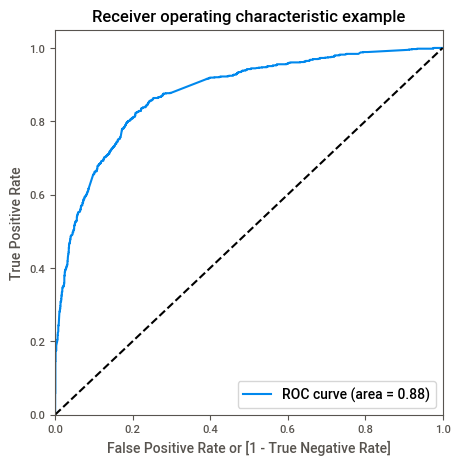

In [154]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_prob)

In [156]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094893,0,1,0,0,0,0,0,0,0,0,0
1,1,0.963176,1,1,1,1,1,1,1,1,1,1,1
2,0,0.077527,0,1,0,0,0,0,0,0,0,0,0
3,1,0.901301,1,1,1,1,1,1,1,1,1,1,1
4,0,0.120283,0,1,1,0,0,0,0,0,0,0,0


In [157]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.363202  1.000000  0.000000
0.1   0.1  0.577672  0.962588  0.358131
0.2   0.2  0.776350  0.873610  0.720877
0.3   0.3  0.796915  0.836198  0.774510
0.4   0.4  0.804994  0.751264  0.835640
0.5   0.5  0.813074  0.676441  0.891003
0.6   0.6  0.798017  0.559151  0.934256
0.7   0.7  0.787367  0.489383  0.957324
0.8   0.8  0.762394  0.391304  0.974048
0.9   0.9  0.731179  0.280081  0.988466


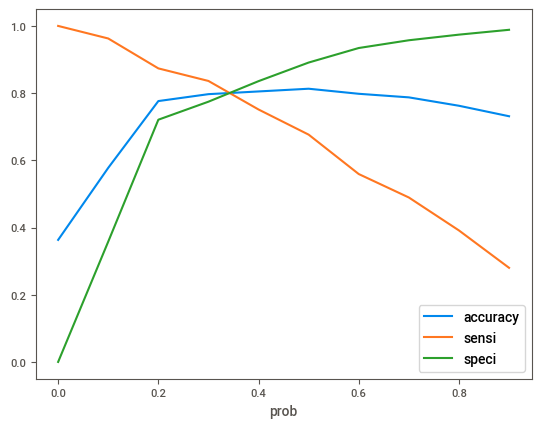

In [158]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [170]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.37 else 0)

y_test_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.094893,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.963176,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.077527,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.901301,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.120283,0,1,1,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn import metrics

In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8082996694821888

In [169]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1425,  309],
       [ 213,  776]])

In [173]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7846309403437816

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.8217993079584776

In [177]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1782006920415225


In [178]:
# Positive predictive value
print (TP / float(TP+FP))

0.7152073732718894


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.86996336996337
